<a href="https://colab.research.google.com/github/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/blob/main/Module_1/LAB_1/M1_Lab_Session_1_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: k-Nearest Neighbors (kNN)

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

Edited and presented for University of San Diego by Dillon Orr, 2022

## Import required packages

In [3]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

import matplotlib.pylab as plt

#Book Authors package to gain access to datasets from book.
import dmba
# pip install dmba

%matplotlib inline

no display found. Using non-interactive Agg backend


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Table 7.1
Add unique labels to each household

In [5]:
# before
mower_df = dmba.load_data('RidingMowers.csv')
mower_df

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


In [6]:
# after
mower_df = dmba.load_data('RidingMowers.csv')
mower_df['Household_Number'] = mower_df.index + 1
mower_df[['Household_Number', 'Income', 'Lot_Size', 'Ownership']]

,Household_Number,Income,Lot_Size,Ownership
0,1,60.0,18.4,Owner
1,2,85.5,16.8,Owner
2,3,64.8,21.6,Owner
3,4,61.5,20.8,Owner
4,5,87.0,23.6,Owner
5,6,110.1,19.2,Owner
6,7,108.0,17.6,Owner
7,8,82.8,22.4,Owner
8,9,69.0,20.0,Owner
9,10,93.0,20.8,Owner


Split data into training (60%) and test (40%) sets

In [7]:
trainData, validData = train_test_split(mower_df, test_size=0.4, random_state=26)
print(trainData.shape, validData.shape)

(14, 4) (10, 4)


Introducing a new household

In [8]:
newHousehold = pd.DataFrame([{'Income': 60, 'Lot_Size': 20, 'Ownership': '?'}])
newHousehold

,Income,Lot_Size,Ownership
0,60,20,?


Create scatter plot of income vs lot size, using color/shape to separate by mower ownership, and labeling with household number

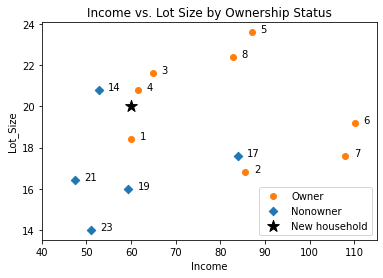

In [14]:
fig, ax = plt.subplots()

subset = trainData.loc[trainData['Ownership']=='Owner']
ax.scatter(subset.Income, subset.Lot_Size, marker='o', label='Owner', color='C1')

subset = trainData.loc[trainData['Ownership']=='Nonowner']
ax.scatter(subset.Income, subset.Lot_Size, marker='D', label='Nonowner', color='C0')

ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('Income')  # set x-axis label
plt.ylabel('Lot_Size')  # set y-axis label

#iterate through data to add label to each point.
for _, row in trainData.iterrows():
    ax.annotate(row.Household_Number, (row.Income + 2, row.Lot_Size))
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 115)
ax.legend(handles, labels, loc=4)

ax.set_title('Income vs. Lot Size by Ownership Status')

plt.show()

## Table 7.2
Initialize normalized training, validation, and complete data frames. Use the training data to learn the transformation.

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Income', 'Lot_Size']])  # Note the use of an array of column names

# Transform the full dataset
mowerNorm = pd.concat([pd.DataFrame(scaler.transform(mower_df[['Income', 'Lot_Size']]), 
                                    columns=['zIncome', 'zLot_Size']),
                       mower_df[['Ownership', 'Household_Number']]], axis=1)
trainNorm = mowerNorm.iloc[trainData.index]
display(trainNorm)
validNorm = mowerNorm.iloc[validData.index]
display(validNorm)

newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold[['Income', 'Lot_Size']]), columns=['zIncome', 'zLot_Size'])
display(newHouseholdNorm)

,zIncome,zLot_Size,Ownership,Household_Number
5,1.797760,0.131181,Owner,6
3,-0.409776,0.743358,Owner,4
7,0.557724,1.355535,Owner,8
20,-1.050235,-0.940129,Nonowner,21
18,-0.505164,-1.093174,Nonowner,19
2,-0.259882,1.049447,Owner,3
4,0.748499,1.814668,Owner,5
0,-0.477910,-0.174908,Owner,1
13,-0.804953,0.743358,Nonowner,14
22,-0.886713,-1.858395,Nonowner,23


,zIncome,zLot_Size,Ownership,Household_Number
12,0.203428,0.284225,Nonowner,13
14,-0.259882,-0.634041,Nonowner,15
11,0.475964,0.437269,Owner,12
8,-0.069107,0.437269,Owner,9
15,-1.241009,0.590314,Nonowner,16
10,-0.886713,1.202491,Owner,11
17,-0.968474,-0.480996,Nonowner,18
19,-0.205375,-0.174908,Nonowner,20
23,-0.341643,-1.552307,Nonowner,24
9,1.021034,0.743358,Owner,10


,zIncome,zLot_Size
0,-0.47791,0.437269


Use k-nearest neighbour

In [11]:
# Get the three neighbors closest to the new household.
knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm[['zIncome', 'zLot_Size']])
distances, indices = knn.kneighbors(newHouseholdNorm)
display(trainNorm.iloc[indices[0], :])  # indices is a list of lists, we are only interested in the first element

,zIncome,zLot_Size,Ownership,Household_Number
3,-0.409776,0.743358,Owner,4
13,-0.804953,0.743358,Nonowner,14
0,-0.477910,-0.174908,Owner,1


## Table 7.3
Initialize a data frame with two columns: `k` and `accuracy`

accuracy by k


,k,accuracy
0,1,0.6
1,2,0.7
2,3,0.8
3,4,0.9
4,5,0.7
5,6,0.9
6,7,0.9
7,8,0.9
8,9,0.9
9,10,0.8


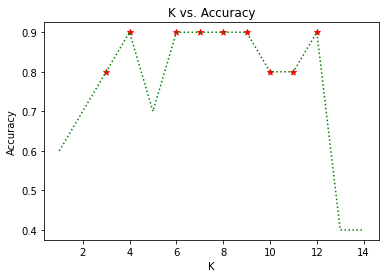

In [12]:
train_X = trainNorm[['zIncome', 'zLot_Size']]
train_y = trainNorm['Ownership']
valid_X = validNorm[['zIncome', 'zLot_Size']]
valid_y = validNorm['Ownership']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print('accuracy by k')
display(results)

# show accuracy by k
plt.plot(results.k, results.accuracy, linestyle=':', c='green')
plt.title('K vs. Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

noteworthy_points = results[results['accuracy'] >= .8]
plt.scatter(noteworthy_points.k, noteworthy_points.accuracy, c='red', marker='*')

plt.show()

## Table 7.4

In [13]:
# Now that we know that k=4 is better than a k=3. 
# So we see what are the 4 nearest neighbors are there for the new dataset.

# Retrain with full dataset
mower_X = mowerNorm[['zIncome', 'zLot_Size']]
mower_y = mowerNorm['Ownership']
knn = KNeighborsClassifier(n_neighbors=4).fit(mower_X, mower_y)
distances, indices = knn.kneighbors(newHouseholdNorm)
print(knn.predict(newHouseholdNorm))
print('Distances',distances)
print('Indices', indices)
print('\n4 nearest neighbors to new household:')
display(mowerNorm.iloc[indices[0], :])

['Owner']
Distances [[0.31358009 0.40880312 0.44793643 0.61217726]]
Indices [[ 3  8 13  0]]

4 nearest neighbors to new household:


,zIncome,zLot_Size,Ownership,Household_Number
3,-0.409776,0.743358,Owner,4
8,-0.069107,0.437269,Owner,9
13,-0.804953,0.743358,Nonowner,14
0,-0.477910,-0.174908,Owner,1
